In [1]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import statsmodels.api as sm

# Principal Component Analysis (PCA)

In [2]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
FEATURES = list(boston.columns[:-1])
FEATURES

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

In [4]:
LABEL = boston.columns[-1]
LABEL

'Median Home Value'

In [5]:
from sklearn.decomposition import PCA

def apply_pca(X, n, add_constant=False):

    pca = PCA(n_components=n)
    x_new = pca.fit_transform(X)

    if add_constant:
        x_new = sm.add_constant(x_new)

    return pca, x_new

In [6]:
pca, _ = apply_pca(boston[FEATURES], len(FEATURES))

In [8]:
print(pca.explained_variance_ratio_)

[9.60040728e-01 2.73884414e-02 8.89341069e-03 1.72579506e-03
 9.36295702e-04 5.35816960e-04 3.19581712e-04 1.09868221e-04
 3.93666446e-05 8.58505778e-06 2.00834312e-06 1.02396314e-07]


In [9]:
sum(pca.explained_variance_ratio_)

1.0

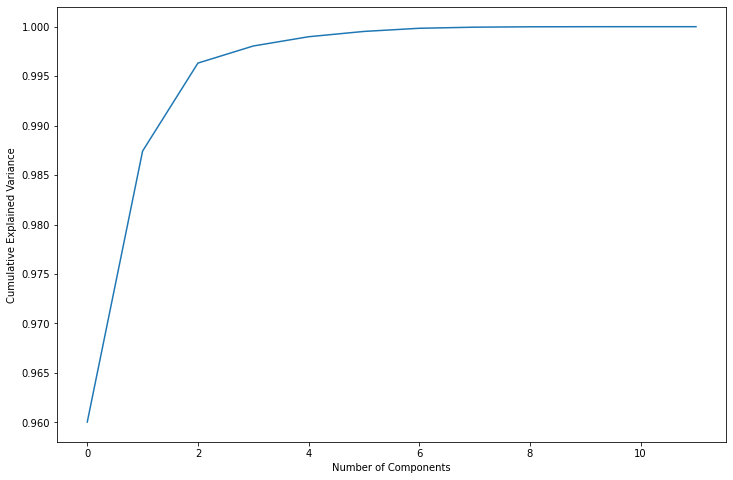

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [11]:
def build_model(regression_fn,
                target,
                features,
                dataset,
                *hyperparameters):
    
    X = dataset[features]
    y = dataset[target]

    _, X_new = apply_pca(X, *hyperparameters)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    model = regression_fn(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'x_initial': X,
        'x_transform': X_new,
        'x_train': X_train,
        'x_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'model': model
    }

In [12]:
def ols_reg(X, y):
    ols = sm.OLS(y, X)
    model = ols.fit()
    return model

In [13]:
def linear_reg(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

In [19]:
model_params = {}
model_params['ols'] = build_model(ols_reg, LABEL, FEATURES, boston, 6, True)
model_params['linear_reg'] = build_model(linear_reg, LABEL, FEATURES, boston, 6)

In [20]:
x_transform = model_params['ols']['x_transform']

In [21]:
x_transform.shape

(506, 7)

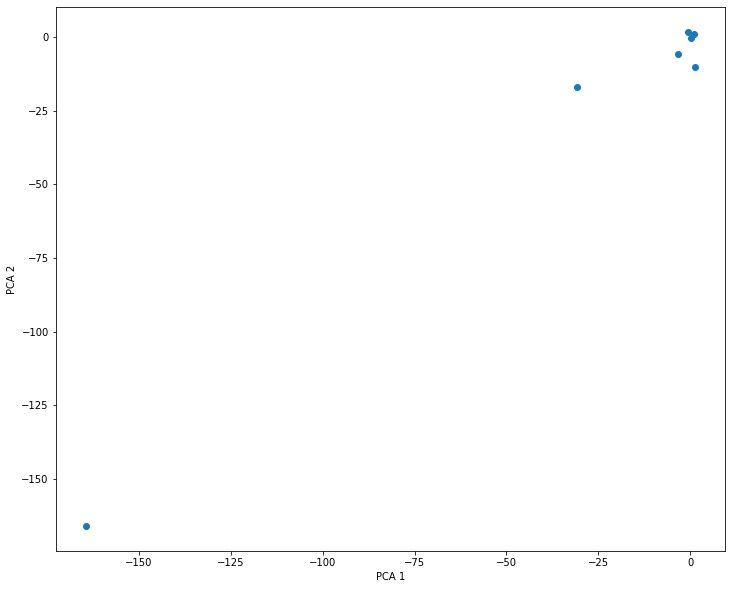

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x_transform[1], x_transform[2], cmap='Spectral')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');

In [17]:
model = model_params['ols']['model']

In [18]:
print(f'R-squared: {model.rsquared}')
print(f'Adj. R-squared: {model.rsquared_adj}')

R-squared: 0.598388335526636
Adj. R-squared: 0.5923186378267866


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Median Home Value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     98.59
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.63e-75
Time:                        22:29:04   Log-Likelihood:                -1299.7
No. Observations:                 404   AIC:                             2613.
Df Residuals:                     397   BIC:                             2641.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5356      0.303     74.262      0.000      21.939      23.132
x1            -0.0270      0.002    -15.031      0.000      -0.031      -0.023
x2             0.0697      0.010      6.832      0.000       0.050       0.090
x3             0.0494      0.018      2.709      0.007       0.014       0.085
x4            -0.3021      0.041     -7.397      0.000      -0.382      -0.222
x5            -0.9341      0.057    -16.517      0.000      -1.045      -0.823
x6             0.2386      0.076      3.157      0.002       0.090       0.387
==============================================================================
Omnibus:                      103.162   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.471
Skew:                           1.327   Prob(JB):                     8.09e-49
Kurtosis:                       5.473   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Singular Value Decomposition Factor Analysis (SVD)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
FEATURES = list(diabetes.columns[:-1])
FEATURES

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [26]:
LABEL = diabetes.columns[-1]
LABEL

'class'

In [27]:
def logistic_fn(X, y):
    lr = LogisticRegression(solver='liblinear')
    lr.fit(X, y)
    return lr

In [28]:
from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):

    fact_a = FactorAnalysis(n_components=n, random_state=0)
    x_new = fact_a.fit_transform(x)
    return fact_a, x_new

In [29]:
def compare_results(results):

    for key in results:
        print('Test: ', key)
        print()
        print('Accuracy: ', results[key]['accuracy'])
        print('Precision: ', results[key]['precision'])
        print('Recall: ', results[key]['recall'])
        print('F1: ', results[key]['f1'])
        print()

In [30]:
def build_model(label,
                    features,
                    dataset,
                    *hyperparameters):
    X = dataset[features]
    y = dataset[label]

    fa_obj, X_new = do_factor_analysis(X, y, *hyperparameters)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
    model = logistic_fn(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'fact_a_obj': fa_obj,
        'transform_x': X_new,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }    

In [32]:
def visualize_results(results, metric):
    n_components = list(range(1, 9))
    scores = [results[key][metric] for key in results]
    plt.figure(figsize=(12, 8))
    plt.plot(n_components, scores)
    pylab.ylim([0,1])
    plt.xlabel('Number of Components')
    plt.ylabel(metric);

In [33]:
result_dict = {}
for i in range(1, 9):
    result_dict['n_components_' + str(i)] = build_model(LABEL, FEATURES, diabetes, i)

In [34]:
compare_results(result_dict)

Test:  n_components_1

Accuracy:  0.6168831168831169
Precision:  0.8
Recall:  0.06451612903225806
F1:  0.11940298507462686

Test:  n_components_2

Accuracy:  0.7662337662337663
Precision:  0.7
Recall:  0.5384615384615384
F1:  0.608695652173913

Test:  n_components_3

Accuracy:  0.7597402597402597
Precision:  0.8780487804878049
Recall:  0.5294117647058824
F1:  0.6605504587155964

Test:  n_components_4

Accuracy:  0.7402597402597403
Precision:  0.6136363636363636
Recall:  0.54
F1:  0.574468085106383

Test:  n_components_5

Accuracy:  0.6948051948051948
Precision:  0.6774193548387096
Recall:  0.3620689655172414
F1:  0.47191011235955055

Test:  n_components_6

Accuracy:  0.7922077922077922
Precision:  0.8292682926829268
Recall:  0.576271186440678
F1:  0.6799999999999999

Test:  n_components_7

Accuracy:  0.7207792207792207
Precision:  0.7352941176470589
Recall:  0.423728813559322
F1:  0.5376344086021505

Test:  n_components_8

Accuracy:  0.7922077922077922
Precision:  0.6739130434782609
Re

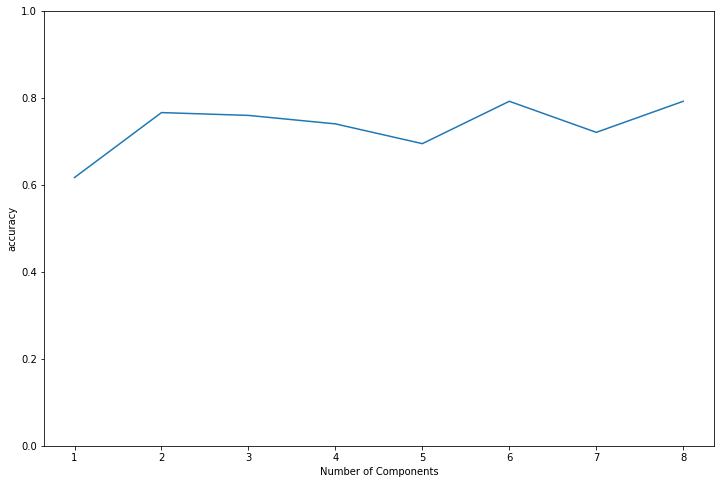

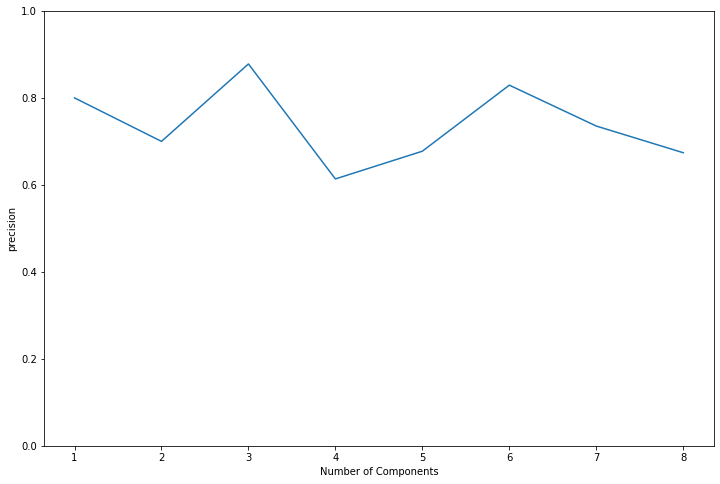

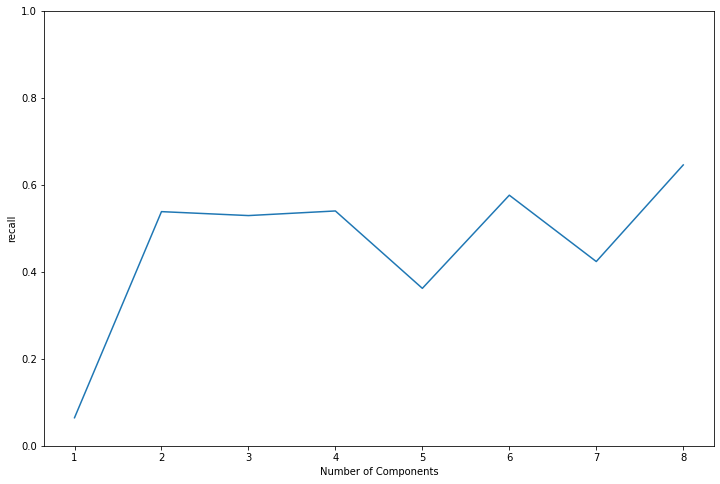

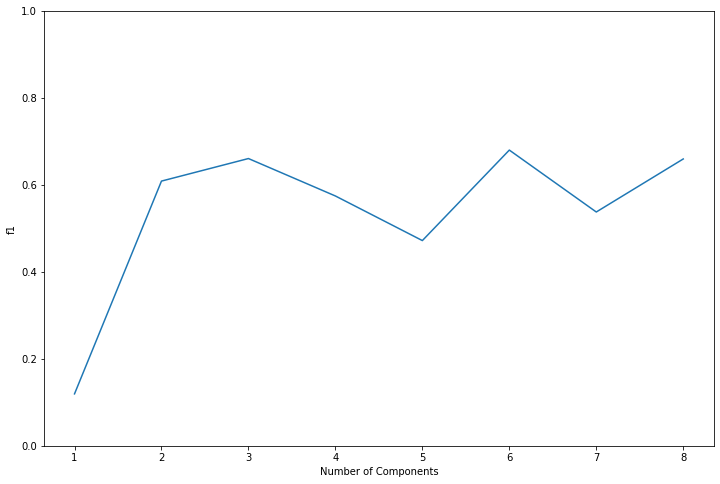

In [35]:
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    visualize_results(result_dict, metric)

In [36]:
fa_obj_final = result_dict['n_components_2']['fact_a_obj']

In [37]:
print(fa_obj_final.noise_variance_) # Estimated noise variance for each feature

[1.09624791e+01 1.28409382e+01 3.64578608e+02 2.03475597e+02
 2.01914855e+00 5.79365953e+01 1.05156608e-01 1.25615935e+02]


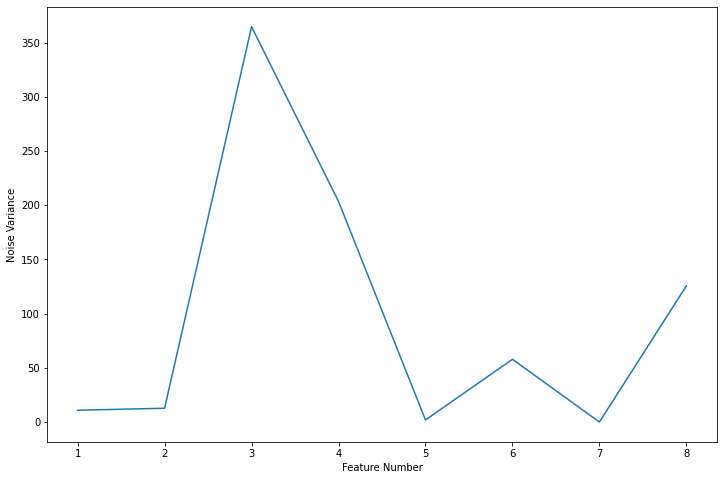

In [38]:
fnum = list(range(1, 9))
plt.figure(figsize=(12, 8))
plt.plot(fnum, fa_obj_final.noise_variance_)
plt.xlabel('Feature Number')
plt.ylabel('Noise Variance');

In [39]:
transform_x_final = result_dict['n_components_2']['transform_x']
transform_x_final.shape

(768, 2)

C:\Users\Safiuddin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


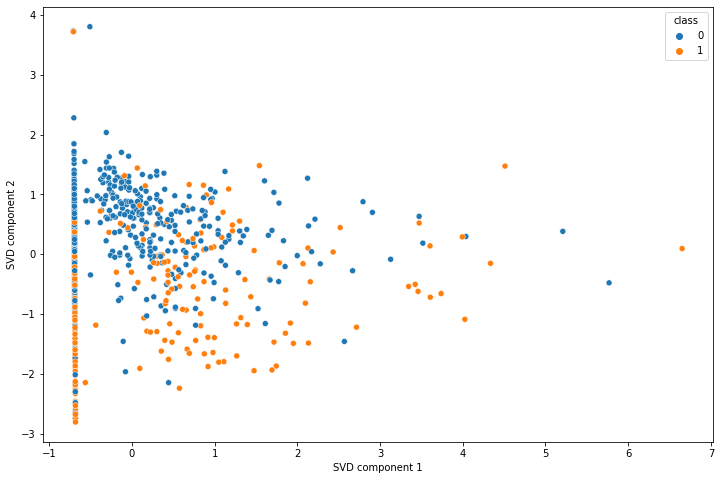

In [43]:
figure = plt.figure(figsize=(12, 8))
sns.scatterplot(transform_x_final[:,0], transform_x_final[:,1], hue=diabetes[LABEL])
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2');

# Linear Discriminant Analysis (LDA)

In [44]:
from sklearn.datasets import load_wine
wine = load_wine()

In [45]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['target'])
print(X.head())
print(y.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

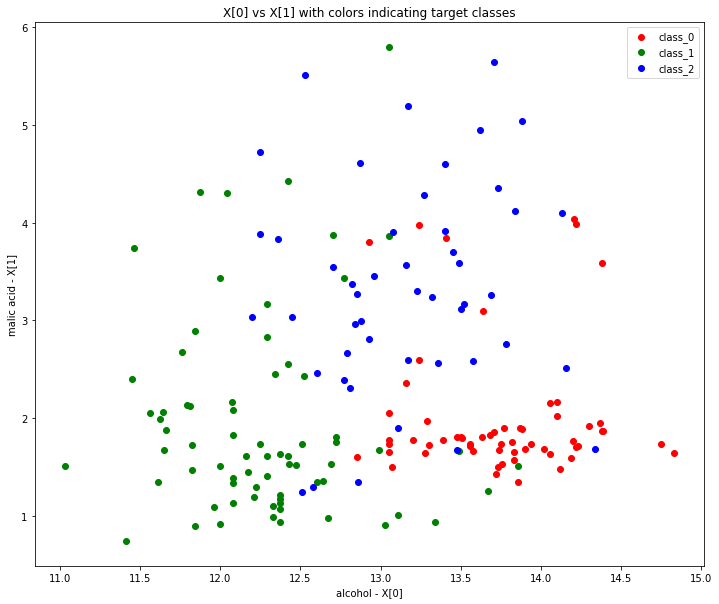

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))

x = np.array(X)

for c, i, target_name in zip('rgb', [0, 1, 2], wine.target_names):
    ax.scatter(x[y.target == i, 0], x[y.target == i, 1], c=c, label=target_name)

plt.title('X[0] vs X[1] with colors indicating target classes')
plt.xlabel('alcohol - X[0]')
plt.ylabel('malic acid - X[1]')
plt.legend();

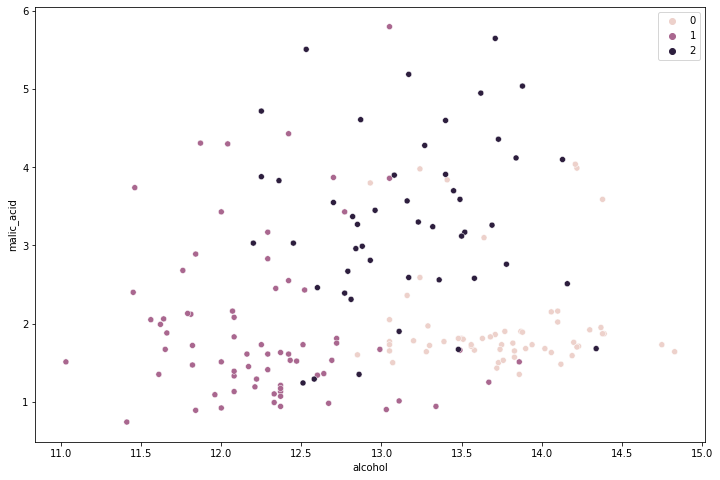

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y['target'])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1]);
plt.legend();

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_new = lda.fit_transform(X, y.values.reshape(-1))
print(lda.explained_variance_ratio_)

[0.68747889 0.31252111]


In [57]:
X_new = pd.DataFrame(X_new, columns=['lda_1', 'lda_2'])
X_new.head()

,lda_1,lda_2
0,4.700244,1.979138
1,4.301958,1.170413
2,3.420720,1.429101
3,4.205754,4.002871
4,1.509982,0.451224


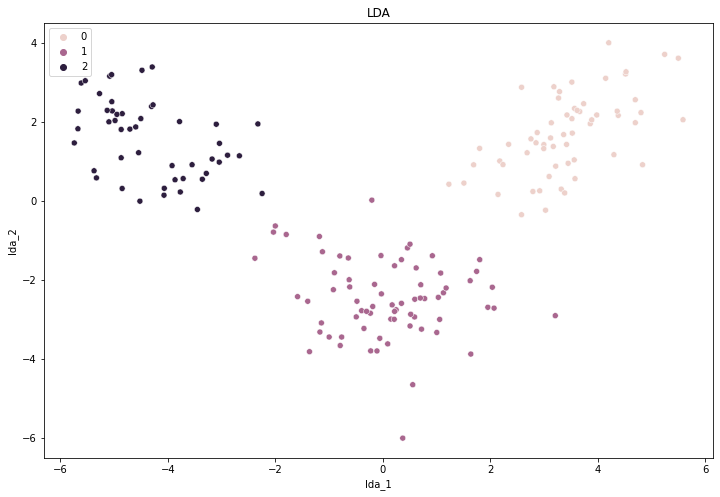

In [59]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_new.iloc[:,0], y=X_new.iloc[:,1], hue=y['target'])
plt.xlabel(X_new.columns[0])
plt.ylabel(X_new.columns[1])
plt.title('LDA')
plt.legend();

In [60]:
X_new.corr()

,lda_1,lda_2
lda_1,1.000000e+00,-2.117492e-16
lda_2,-2.117492e-16,1.000000e+00
